In [1054]:
import pandas as pd
import numpy as np

In [1055]:
# https://electionlab.mit.edu/data#data

In [1056]:
df2 = pd.read_csv('1976-2016-house.csv')

In [1057]:
df2['year'].unique()

array([1990, 2016, 2006, 1984, 1986, 2002, 1992, 1998, 1976, 1996, 2012,
       2010, 1980, 1982, 1978, 2008, 2000, 1988, 2004, 2014, 1994])

In [1058]:
df2_year = df2.loc[df2['year']>=2016]

In [1059]:
df2_year.shape

(1441, 16)

In [1060]:
df2_year.loc[df2_year['state']=='Wyoming'];

In [1061]:
df2_year.loc[df2_year['candidate']=='Ryan Greene', 'party'] ='democrat'
# df.loc[df['column_name'] == some_value]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1062]:
df2_year.loc[df2_year['candidate']=='Liz Cheney', 'party'] ='republican'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1063]:
df2_party_rep = df2_year.loc[df2_year['party']=='republican']

In [1064]:
df2_party_rep.tail();

In [1065]:
df2_party_dem = df2_year.loc[df2_year['party']=='democrat']

In [1066]:
df2_party_dem.tail();

In [1067]:
len(df2_party_dem)

422

In [1068]:
len(df2_party_rep)

420

In [1069]:
df2_concat = pd.concat([df2_party_dem, df2_party_rep])
df2_concat.sort_values(['state','district']);

In [1070]:
df2_concat = df2_concat.drop(['state_fips', 'state_cen', 'state_ic', 'office', 'stage', 'special', 'candidate', 'writein', 'version', 'totalvotes', 'year'], axis=1)

In [1071]:
df2_sort = df2_concat.sort_values(['state','district'])

In [1072]:
df2_sort.head();

In [1073]:
df2_sort['totalvotes'] = df2_sort.groupby(['state', 'district']).candidatevotes.transform('sum')
# df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

In [1074]:
df2_sort['candidatevotes_combined'] = df2_sort.groupby(['state','district','party']).candidatevotes.transform('sum')

In [1075]:
df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()

In [1076]:
df2_sort['per_vote'] = np.round(np.where(df2_sort['candidatevotes_combined'] > 0, df2_sort['candidatevotes_combined']/df2_sort['totalvotes'], 0), 4)
df2_sort

,state,district,party,candidatevotes_combined,totalvotes,per_vote
358,Alabama,1,republican,208083,208083,1.0000
174,Alabama,2,democrat,112089,246975,0.4538
497,Alabama,2,republican,134886,246975,0.5462
463,Alabama,3,democrat,94549,286713,0.3298
425,Alabama,3,republican,192164,286713,0.6702
351,Alabama,4,republican,235925,235925,1.0000
352,Alabama,5,democrat,102234,307881,0.3321
278,Alabama,5,republican,205647,307881,0.6679
265,Alabama,6,democrat,83709,329022,0.2544
281,Alabama,6,republican,245313,329022,0.7456


In [1077]:
len(df2_sort['totalvotes'].unique())

435

In [1078]:
df2_sort['congdist'] = df2_sort['state'].map(str) + df2_sort['district'].astype(str)
# dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

In [1079]:
len(df2_sort)

808

In [1080]:
df2_sort.head();

In [1081]:
df2_final = df2_sort.drop(['candidatevotes_combined','totalvotes'], axis=1)

In [1082]:
df2_final.head()

,state,district,party,per_vote,congdist
358,Alabama,1,republican,1.0000,Alabama1
174,Alabama,2,democrat,0.4538,Alabama2
497,Alabama,2,republican,0.5462,Alabama2
463,Alabama,3,democrat,0.3298,Alabama3
425,Alabama,3,republican,0.6702,Alabama3


In [1083]:
dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)

In [1084]:
rep_vote = df2_final['rep_vote'] = np.where(df2_final['party'] == 'republican', df2_final['per_vote'], 0)

In [1085]:
df2_final['rep_vote']= np.where((df2_final['party'] == 'democrat') & (df2_final['rep_vote'] == 0) & df2_final['dem_vote'] != 0, 1 - df2_final['dem_vote'],rep_vote)

In [1086]:
df2_final['dem_vote']= np.where((df2_final['party'] == 'republican') & (df2_final['dem_vote'] == 0) & df2_final['rep_vote'] != 0, 1 - df2_final['rep_vote'],dem_vote)

In [1087]:
df2_final['dem_vote'] = df2_final['dem_vote'].round(4)

In [1088]:
df2_final['rep_vote'] = df2_final['rep_vote'].round(4)

In [1089]:
# df2_final.head()

In [1090]:
df2_final = df2_final[['state','district','congdist','dem_vote','rep_vote']].drop_duplicates().reset_index().drop(columns = 'index')
df2_final
# df2_sort = df2_sort[['state','district','party','candidatevotes_combined','totalvotes']].drop_duplicates()

,state,district,congdist,dem_vote,rep_vote
0,Alabama,1,Alabama1,0.0000,1.0000
1,Alabama,2,Alabama2,0.4538,0.5462
2,Alabama,3,Alabama3,0.3298,0.6702
3,Alabama,4,Alabama4,0.0000,1.0000
4,Alabama,5,Alabama5,0.3321,0.6679
5,Alabama,6,Alabama6,0.2544,0.7456
6,Alabama,7,Alabama7,1.0000,0.0000
7,Alaska,0,Alaska0,0.4172,0.5828
8,Arizona,1,Arizona1,0.5388,0.4612
9,Arizona,2,Arizona2,0.4304,0.5696


In [1091]:
# df2_test.iloc[4] == df2_test.iloc[5]

In [1092]:
# print(df2_test.iloc[4].dem_vote)
# print(df2_test.iloc[5].dem_vote)



## indepedent vars

### sex percentage

In [1093]:
# https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

In [1094]:
df3 = pd.read_csv('ACS_16_1YR_S0101_with_ann.csv')

In [1095]:
df3.tail();

In [1096]:
df3.shape

(438, 219)

In [1097]:
drop_first = df3.drop(0)
# drop_first['GEO.display-label'].str.split(' ',0)[8][2]

In [1098]:
d_f = drop_first['GEO.display-label'][:-1]

In [1099]:
d_f[1]

'Congressional District 1 (115th Congress), Alabama'

In [1100]:
type(d_f)

pandas.core.series.Series

In [1101]:
d_f.str.split(' ',0)[2]

['Congressional', 'District', '2', '(115th', 'Congress),', 'Alabama']

In [1102]:
# name_dist_state+name_dist_num

In [1103]:
list(drop_first['GEO.display-label'])[-1]

'Resident Commissioner District (at Large) (115th Congress), Puerto Rico'

In [1104]:
def state_num():
    split_list = []
    for x in d_f:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in d_f:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
state_num();


In [1105]:
len(state_num())

436

In [1106]:
total_pop = df3['HC01_EST_VC01'][1:-1].astype(int)
total_pop.head();

In [1107]:
male_pop = df3['HC02_EST_VC01'][1:-1].astype(int)

In [1108]:
female_pop = df3['HC03_EST_VC01'][1:-1].astype(int)

In [1109]:
pop_list = list(zip(state_num(), total_pop, male_pop, female_pop, round(male_pop/total_pop,4), round(female_pop/total_pop,4)))

In [1110]:
df_pop = pd.DataFrame(pop_list, columns=['congdist','totalpop','malepop','femalepop','malepopper','femalepopper'])

In [1111]:
df_s_and_p = df_pop.drop(['totalpop', 'malepop', 'femalepop'], axis=1)

In [1112]:
df_s_and_p.head();

In [1113]:
df_state_and_pop = pd.merge(df2_final, df_s_and_p, on=['congdist'], how='inner')
# pd.merge(bas_sort, bp_sort, on=[0], how='inner')

In [1114]:
df_state_and_pop.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074


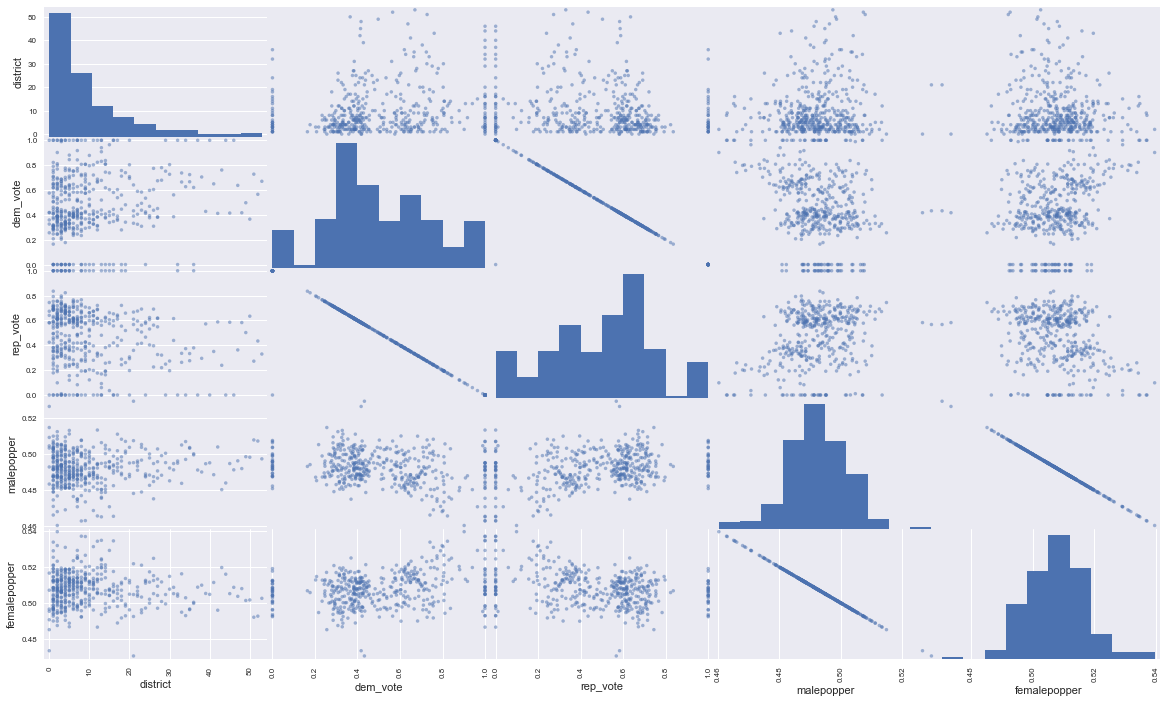

In [1115]:
pd.plotting.scatter_matrix(df_state_and_pop, figsize=[20,12]);

### median age

In [1116]:
df4 = pd.read_csv('ACS_16_1YR_B01002_with_ann.csv')

In [1117]:
df4.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,HD02_VD04
0,Id,Id2,Geography,Estimate; Median age -- - Total:,Margin of Error; Median age -- - Total:,Estimate; Median age -- - Male,Margin of Error; Median age -- - Male,Estimate; Median age -- - Female,Margin of Error; Median age -- - Female
1,5001500US0101,0101,"Congressional District 1 (115th Congress), Ala...",39.6,0.4,38.3,0.6,41.0,0.7
2,5001500US0102,0102,"Congressional District 2 (115th Congress), Ala...",38.2,0.6,36.7,0.6,40.1,0.6
3,5001500US0103,0103,"Congressional District 3 (115th Congress), Ala...",38.3,0.5,36.6,0.6,39.8,0.7
4,5001500US0104,0104,"Congressional District 4 (115th Congress), Ala...",40.7,0.4,39.7,0.7,42.0,0.7


In [1118]:
median_age = df4['HD01_VD02'][1:-1]

In [1119]:
age_list = list(zip(state_num(), median_age))

In [1120]:
df_al = pd.DataFrame(age_list, columns=['congdist','avg_age'])

In [1121]:
df_final2 = pd.merge(df_state_and_pop, df_al, on=['congdist'], how='inner')

In [1122]:
df_final2.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1


In [1123]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 8 columns):
state           435 non-null object
district        435 non-null int64
congdist        435 non-null object
dem_vote        435 non-null float64
rep_vote        435 non-null float64
malepopper      435 non-null float64
femalepopper    435 non-null float64
avg_age         435 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 30.6+ KB


### Ethnicity

In [1124]:
df5 = pd.read_csv('ACS_16_5YR_DP05_with_ann.csv')

In [1125]:
len(df5)

438

In [1126]:
df5.iloc[:,265:280].head()

,HC03_VC88,HC04_VC88,HC01_VC89,HC02_VC89,HC03_VC89,HC04_VC89,HC01_VC90,HC02_VC90,HC03_VC90,HC04_VC90,HC01_VC91,HC02_VC91,HC03_VC91,HC04_VC91,HC01_VC92
0,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...,Margin of Error; HISPANIC OR LATINO AND RACE -...,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...,Margin of Error; HISPANIC OR LATINO AND RACE -...,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...,Margin of Error; HISPANIC OR LATINO AND RACE -...,Percent; HISPANIC OR LATINO AND RACE - Total p...,Percent Margin of Error; HISPANIC OR LATINO AN...,Estimate; HISPANIC OR LATINO AND RACE - Total ...
1,3.0,0.1,10847,1002,1.6,0.1,2559,733,0.4,0.1,1030,404,0.1,0.1,6393
2,3.5,0.1,14755,800,2.2,0.1,2788,459,0.4,0.1,944,264,0.1,0.1,5374
3,2.9,0.1,10905,957,1.6,0.1,3265,834,0.5,0.1,451,183,0.1,0.1,5700
4,6.2,0.1,26609,1770,3.9,0.3,1311,378,0.2,0.1,1021,537,0.1,0.1,13380


In [1127]:
white_per = df5['HC03_VC49'][1:-1].astype(float)

In [1128]:
black_per = df5['HC03_VC50'][1:-1].astype(float)

In [1129]:
asian_per = df5['HC03_VC56'][1:-1].astype(float)

In [1130]:
hisp_lat_per = df5['HC03_VC88'][1:-1].astype(float)

In [1131]:
ethnicity_per = list(zip(state_num(), white_per.div(100).round(4), black_per.div(100).round(4), asian_per.div(100).round(4), hisp_lat_per.div(100).round(4)))

In [1132]:
df_ep = pd.DataFrame(ethnicity_per, columns=['congdist','white_per','black_per','asian_per','latino_per'])

In [1133]:
df_final3 = pd.merge(df_final2, df_ep, on=['congdist'], how='inner')

In [1134]:
df_final3.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049


### urban/rural

In [1135]:
df6 = pd.read_csv('DEC_10_115_P2_with_ann.csv')

In [1136]:
df6.head()

,GEO.id,GEO.id2,GEO.display-label,D001,D002,D003,D004,D005,D006
0,Id,Id2,Geography,Total:,Urban:,Urban: - Inside urbanized areas,Urban: - Inside urban clusters,Rural,Not defined for this file
1,5001500US0101,0101,"Congressional District 1 (115th Congress), Ala...",682820,456228,389832,66396,226592,0
2,5001500US0102,0102,"Congressional District 2 (115th Congress), Ala...",682820,373585,259770,113815,309235,0
3,5001500US0103,0103,"Congressional District 3 (115th Congress), Ala...",682819,343078,248414,94664,339741,0
4,5001500US0104,0104,"Congressional District 4 (115th Congress), Ala...",682819,236405,122567,113838,446414,0


In [1137]:
ur_drop = df6['GEO.display-label'][1:-1]

In [1138]:
ur_drop.str.split(' ')[2]

['Congressional', 'District', '2', '(115th', 'Congress),', 'Alabama']

In [1139]:
ur_drop.str.split(', ')[2][1]

'Alabama'

In [1140]:
def urban_congdist():
    split_list = []
    for x in ur_drop:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in ur_drop:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
urban_congdist();

In [1141]:
urban_list = df6['D002'][1:-1].astype(int)

In [1142]:
rural_list = df6['D005'][1:-1].astype(int)

In [1143]:
 ur_per = list(zip(urban_congdist(), urban_list, rural_list))

In [1144]:
df_ur = pd.DataFrame(ur_per, columns=['congdist','urbanpop','ruralpop'])

In [1145]:
df_ur['totalpop'] = df_ur.sum(axis=1)
# dem_vote = df2_final['dem_vote'] = np.where(df2_final['party'] == 'democrat', df2_final['per_vote'], 0)

In [1146]:
df_ur.head()

,congdist,urbanpop,ruralpop,totalpop
0,Alabama1,456228,226592,682820
1,Alabama2,373585,309235,682820
2,Alabama3,343078,339741,682819
3,Alabama4,236405,446414,682819
4,Alabama5,447466,235353,682819


In [1147]:
df_ur['urban_per'] = round(df_ur['urbanpop']/df_ur['totalpop'],4)

In [1148]:
df_ur['rural_per'] = round(df_ur['ruralpop']/df_ur['totalpop'],4)

In [1149]:
df_ur = df_ur.drop(['urbanpop','ruralpop','totalpop'], axis=1);

In [1150]:
df_ur.head()

,congdist,urban_per,rural_per
0,Alabama1,0.6682,0.3318
1,Alabama2,0.5471,0.4529
2,Alabama3,0.5024,0.4976
3,Alabama4,0.3462,0.6538
4,Alabama5,0.6553,0.3447


In [1151]:
df_final4 = pd.merge(df_final3, df_ur, on=['congdist'], how='inner')

In [1152]:
df_final4.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447


# adding in D/R column

In [1153]:
df_final4['D/R'] = np.where((df_final4['dem_vote']>.5),0,1)
# 0 = democrat  1 = republican

In [1154]:
df_final4.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per,D/R
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318,1
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529,1
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976,1
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538,1
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447,1


In [1155]:
df_final4['D/R_scale'] = np.where((df_final4['D/R'] == 0), .5 - (df_final4['dem_vote']/2), .5 + df_final4['rep_vote']/2)

In [1156]:
df_final4.head(15)

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,rural_per,D/R,D/R_scale
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,0.014,0.030,0.6682,0.3318,1,1.00000
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.4529,1,0.77310
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.4976,1,0.83510
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,0.006,0.062,0.3462,0.6538,1,1.00000
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.3447,1,0.83395
5,Alabama,6,Alabama6,0.2544,0.7456,0.4830,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.3083,1,0.87280
6,Alabama,7,Alabama7,1.0000,0.0000,0.4708,0.5292,36.5,0.334,0.634,0.007,0.027,0.7216,0.2784,0,0.00000
7,Alaska,0,Alaska0,0.4172,0.5828,0.5265,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.3398,1,0.79140
8,Arizona,1,Arizona1,0.5388,0.4612,0.5037,0.4963,37.5,0.650,0.023,0.016,0.217,0.6206,0.3794,0,0.23060
9,Arizona,2,Arizona2,0.4304,0.5696,0.4882,0.5118,40.8,0.811,0.041,0.029,0.276,0.8918,0.1082,1,0.78480


### school

In [1157]:
df7 = pd.read_csv('ACS_16_1YR_B06009_with_ann.csv')

In [1158]:
len(df7)

437

In [1159]:
less_hs = df7['HD01_VD03'][1:-1].astype(int)

In [1160]:
hs = df7['HD01_VD04'][1:-1].astype(int)

In [1161]:
some_college = df7['HD01_VD05'][1:-1].astype(int)

In [1162]:
bach_degree = df7['HD01_VD06'][1:-1].astype(int)

In [1163]:
grad_degree = df7['HD01_VD07'][1:-1].astype(int)

In [1164]:
tot_school = df7['HD01_VD01'][1:-1].astype(int)

In [1165]:
school_per = list(zip(state_num(), less_hs, hs, some_college, bach_degree, grad_degree, tot_school))

In [1166]:
df_sp = pd.DataFrame(school_per, columns=['congdist', 'less_hs', 'hs', 'some_college', 'bach_degree', 'grad_degree', 'tot_school'])

In [1167]:
df_sp.head()

,congdist,less_hs,hs,some_college,bach_degree,grad_degree,tot_school
0,Alabama1,62465,158178,146731,73720,42534,483628
1,Alabama2,74628,148183,140230,64329,36840,464210
2,Alabama3,77255,144060,143277,64031,43454,472077
3,Alabama4,92610,157757,141552,51327,29094,472340
4,Alabama5,66565,137219,138047,90532,57866,490229


In [1168]:
df_sp['less_hs_per'] = round(df_sp['less_hs']/df_sp['tot_school'],4)

In [1169]:
df_sp['hs_per'] = round(df_sp['hs']/df_sp['tot_school'],4)

In [1170]:
df_sp['some_college_per'] = round(df_sp['some_college']/df_sp['tot_school'],4)

In [1171]:
df_sp['bach_degree_per'] = round(df_sp['bach_degree']/df_sp['tot_school'],4)

In [1172]:
df_sp['grad_degree_per'] = round(df_sp['grad_degree']/df_sp['tot_school'],4)

In [1173]:
df_sp.head()

,congdist,less_hs,hs,some_college,bach_degree,grad_degree,tot_school,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per
0,Alabama1,62465,158178,146731,73720,42534,483628,0.1292,0.3271,0.3034,0.1524,0.0879
1,Alabama2,74628,148183,140230,64329,36840,464210,0.1608,0.3192,0.3021,0.1386,0.0794
2,Alabama3,77255,144060,143277,64031,43454,472077,0.1636,0.3052,0.3035,0.1356,0.0920
3,Alabama4,92610,157757,141552,51327,29094,472340,0.1961,0.3340,0.2997,0.1087,0.0616
4,Alabama5,66565,137219,138047,90532,57866,490229,0.1358,0.2799,0.2816,0.1847,0.1180


In [1174]:
df_sp = df_sp.drop(['less_hs','hs','some_college','bach_degree','grad_degree','tot_school'], axis=1)

In [1175]:
df_sp.head()

,congdist,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per
0,Alabama1,0.1292,0.3271,0.3034,0.1524,0.0879
1,Alabama2,0.1608,0.3192,0.3021,0.1386,0.0794
2,Alabama3,0.1636,0.3052,0.3035,0.1356,0.0920
3,Alabama4,0.1961,0.3340,0.2997,0.1087,0.0616
4,Alabama5,0.1358,0.2799,0.2816,0.1847,0.1180


In [1176]:
df_final5 = pd.merge(df_final4, df_sp, on=['congdist'], how='left')

In [1177]:
len(df_final5)

435

### foreign citizens

In [1178]:
df8 = pd.read_csv('ACS_16_1YR_B05002_with_ann.csv')

In [1179]:
df8.iloc[:,25:45].head()

,HD01_VD12,HD02_VD12,HD01_VD13,HD02_VD13,HD01_VD14,HD02_VD14,HD01_VD15,HD02_VD15,HD01_VD16,HD02_VD16,HD01_VD17,HD02_VD17,HD01_VD18,HD02_VD18,HD01_VD19,HD02_VD19,HD01_VD20,HD02_VD20,HD01_VD21,HD02_VD21
0,Estimate; Native: - Born outside the United St...,Margin of Error; Native: - Born outside the Un...,Estimate; Foreign born:,Margin of Error; Foreign born:,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Naturalized U.S. cit...,Margin of Error; Foreign born: - Naturalized U...,Estimate; Foreign born: - Not a U.S. citizen,Margin of Error; Foreign born: - Not a U.S. ci...
1,2996,1098,19001,3257,10369,2222,1505,543,4933,1568,632,704,66,111,2963,1240,270,257,8632,2286
2,7248,1657,17536,2028,6621,1366,1224,420,2701,935,323,236,0,195,2292,848,81,125,10915,1661
3,5803,1378,19700,2113,6841,1469,1208,443,3772,1041,0,195,59,102,1496,929,306,364,12859,1782
4,3829,1212,23357,2482,6998,1871,219,195,2431,807,332,376,0,195,3957,1474,59,99,16359,2175


In [1180]:
total_citizens = df8['HD01_VD01'][1:-1].astype(int)

In [1181]:
native_citizens = df8['HD01_VD02'][1:-1].astype(int)

In [1182]:
foreign_citizens = df8['HD01_VD13'][1:-1].astype(int)

In [1183]:
citizens_per = list(zip(state_num(), native_citizens, foreign_citizens, total_citizens))

In [1184]:
df_cp = pd.DataFrame(citizens_per, columns=['congdist', 'natcit', 'forcit', 'totcit'])

In [1263]:
df_cp.head()

,congdist,foreign_per,native_per
0,Alabama1,0.0270,0.9730
1,Alabama2,0.0257,0.9743
2,Alabama3,0.0278,0.9722
3,Alabama4,0.0342,0.9658
4,Alabama5,0.0435,0.9565


In [1186]:
df_cp['foreign_per'] = round(df_cp['forcit']/df_cp['totcit'],4)

In [1187]:
df_cp['native_per'] = round(df_cp['natcit']/df_cp['totcit'],4)

In [1264]:
df_cp.head()

,congdist,foreign_per,native_per
0,Alabama1,0.0270,0.9730
1,Alabama2,0.0257,0.9743
2,Alabama3,0.0278,0.9722
3,Alabama4,0.0342,0.9658
4,Alabama5,0.0435,0.9565


In [1189]:
df_cp = df_cp.drop(['totcit', 'natcit', 'forcit'], axis=1)

In [1190]:
df_cp.head()

,congdist,foreign_per,native_per
0,Alabama1,0.0270,0.9730
1,Alabama2,0.0257,0.9743
2,Alabama3,0.0278,0.9722
3,Alabama4,0.0342,0.9658
4,Alabama5,0.0435,0.9565


In [1191]:
df_final6 = pd.merge(df_final5, df_cp, on=['congdist'], how='left')

In [1192]:
len(df_final6)

435

### pop over 65

In [1193]:
df9 = pd.read_csv('ACS_16_1YR_S0103_with_ann.csv')

In [1194]:
len(df9)

432

In [1195]:
total_pop_65 = df9['HC01_EST_VC01'][1:].astype(int)

In [1196]:
vet_pop = df9['HC02_EST_VC01'][1:].astype(int)

In [1197]:
vet_drop = df9['GEO.display-label'][1:]

In [1198]:
def vet_congdist():
    split_list = []
    for x in vet_drop:
        s = x.split(' ')[2]
        if s == '(at':
            s = '0'
        else:
            s         
        split_list.append(s)
        
    name_list = []
    for y in vet_drop:
        n = y.split(', ')[1]
        name_list.append(n)
        
    zip_list = list(zip(name_list, split_list))
        
    final_list = []
    for a,b in zip_list:
        final_list.append("".join((a,b)))
    
    return final_list
    
vet_congdist();

In [1199]:
vets_per = list(zip(vet_congdist(), total_pop_65, vet_pop))

In [1200]:
df_vp = pd.DataFrame(vets_per, columns=['congdist','totalpop','vetpop'])

In [1201]:
df_vp.head()

,congdist,totalpop,vetpop
0,Alabama1,704457,120999
1,Alabama2,681621,109957
2,Alabama3,709482,109732
3,Alabama4,683273,121954
4,Alabama5,712529,112419


In [1202]:
df_vp['over_65_per'] = round(df_vp['vetpop']/df_vp['totalpop'],4)

In [1203]:
df_vp.head()

,congdist,totalpop,vetpop,over_65_per
0,Alabama1,704457,120999,0.1718
1,Alabama2,681621,109957,0.1613
2,Alabama3,709482,109732,0.1547
3,Alabama4,683273,121954,0.1785
4,Alabama5,712529,112419,0.1578


In [1204]:
df_vp = df_vp.drop(['totalpop', 'vetpop'], axis=1)

In [1205]:
df_vp.head()

,congdist,over_65_per
0,Alabama1,0.1718
1,Alabama2,0.1613
2,Alabama3,0.1547
3,Alabama4,0.1785
4,Alabama5,0.1578


In [1206]:
df_final7 = pd.merge(df_final6, df_vp, on=['congdist'], how='left')

In [1207]:
df_final7.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,D/R,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,1,1.00000,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,1,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,1,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,1,1.00000,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,1,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578


In [1208]:
df_final7.shape

(435, 24)

### food stamps

In [1209]:
df10 = pd.read_csv('ACS_17_1YR_B19058_with_ann.csv')

In [1210]:
df10.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With cash public assistance...,Margin of Error; Total: - With cash public ass...,Estimate; Total: - No cash public assistance o...,Margin of Error; Total: - No cash public assis...
1,5001500US0101,0101,"Congressional District 1 (115th Congress), Ala...",262679,4254,35993,3194,226686,4826
2,5001500US0102,0102,"Congressional District 2 (115th Congress), Ala...",245124,4575,39365,2728,205759,4553
3,5001500US0103,0103,"Congressional District 3 (115th Congress), Ala...",274860,4733,38978,3620,235882,5457
4,5001500US0104,0104,"Congressional District 4 (115th Congress), Ala...",254061,4478,35922,2711,218139,4713


In [1211]:
total_houses = df10['HD01_VD01'][1:-1].astype(int)

In [1212]:
cash_asst = df10['HD01_VD02'][1:-1].astype(int)

In [1213]:
cash_per = list(zip(state_num(), total_houses, cash_asst))

In [1214]:
cash_per

[('Alabama1', 262679, 35993),
 ('Alabama2', 245124, 39365),
 ('Alabama3', 274860, 38978),
 ('Alabama4', 254061, 35922),
 ('Alabama5', 284883, 36652),
 ('Alabama6', 262296, 19251),
 ('Alabama7', 257762, 57632),
 ('Alaska0', 250741, 33454),
 ('Arizona1', 255285, 36395),
 ('Arizona2', 303440, 37566),
 ('Arizona3', 242271, 49786),
 ('Arizona4', 307261, 33592),
 ('Arizona5', 291062, 15522),
 ('Arizona6', 315622, 18280),
 ('Arizona7', 243861, 55572),
 ('Arizona8', 290198, 18254),
 ('Arizona9', 303972, 25410),
 ('Arkansas1', 283126, 43820),
 ('Arkansas2', 293697, 27804),
 ('Arkansas3', 301844, 28547),
 ('Arkansas4', 274415, 41826),
 ('California1', 282678, 33089),
 ('California2', 278942, 22208),
 ('California3', 251430, 30218),
 ('California4', 280226, 17627),
 ('California5', 265405, 21659),
 ('California6', 277502, 40783),
 ('California7', 263770, 24740),
 ('California8', 227852, 41391),
 ('California9', 236131, 32903),
 ('California10', 237723, 29897),
 ('California11', 267976, 21183),
 (

In [1215]:
df_cap = pd.DataFrame(cash_per, columns=['congdist', 'totalpop', 'cashpop'])

In [1216]:
df_cap.head()

,congdist,totalpop,cashpop
0,Alabama1,262679,35993
1,Alabama2,245124,39365
2,Alabama3,274860,38978
3,Alabama4,254061,35922
4,Alabama5,284883,36652


In [1217]:
df_cap['cash_asst_per'] = round(df_cap['cashpop']/df_cap['totalpop'],4)

In [1218]:
df_cap.head()

,congdist,totalpop,cashpop,cash_asst_per
0,Alabama1,262679,35993,0.1370
1,Alabama2,245124,39365,0.1606
2,Alabama3,274860,38978,0.1418
3,Alabama4,254061,35922,0.1414
4,Alabama5,284883,36652,0.1287


In [1219]:
df_cap = df_cap.drop(['totalpop', 'cashpop'], axis=1)

In [1220]:
df_cap.head()

,congdist,cash_asst_per
0,Alabama1,0.1370
1,Alabama2,0.1606
2,Alabama3,0.1418
3,Alabama4,0.1414
4,Alabama5,0.1287


In [1221]:
df_final8 = pd.merge(df_final7, df_cap, on=['congdist'], how='left')

In [1222]:
df_final8.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,1.00000,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718,0.1370
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,1.00000,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785,0.1414
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287


# mubarak code

In [1223]:
marital_add= pd.read_csv('ACS_16_1YR_maritalstatus_with_ann.csv')
marriage_per= marital_add['HC02_EST_VC01'][1:-1].astype(float)
marriage_list= list(zip(state_num(), marriage_per.div(100).round(4)))
df_mp= pd.DataFrame(marriage_list, columns = ['congdist', 'marriage_per'])
df_final9= pd.merge(df_final8, df_mp, on= ['congdist'], how= 'left')

In [1224]:
df_final9.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,0.1292,0.3271,0.3034,0.1524,0.0879,0.0270,0.9730,0.1718,0.1370,0.454
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,0.1961,0.3340,0.2997,0.1087,0.0616,0.0342,0.9658,0.1785,0.1414,0.487
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528


In [1225]:
employ_per = pd.read_csv('ACS_16_1YR_S2301_with_ann.csv')
employee_per = employ_per['HC03_EST_VC01'][1:-1].astype(float)
employee_per_list= list(zip(state_num(), employee_per.div(100).round(4)))
df_ep= pd.DataFrame(employee_per_list, columns = ['congdist', 'employee_per'])
df_final10= pd.merge(df_final9, df_ep, on= ['congdist'], how= 'left')

unemploy_per= employ_per['HC04_EST_VC01'][1:-1].astype(float)
unemployee_per_list= list(zip(state_num(), unemploy_per.div(100).round(4)))
df_uep= pd.DataFrame(unemployee_per_list, columns = ['congdist', 'unemployee_per'])
df_final11= pd.merge(df_final10, df_uep, on= ['congdist'], how= 'left')

In [1226]:
len(df_final11)

435

In [1227]:
median_income = pd.read_csv('ACS_16_1YR_medianincome_with_ann.csv')
med_income= median_income['HC02_EST_VC02'][1:-1].astype(float)
median_income_list= list(zip(state_num(), med_income))
df_md_inc= pd.DataFrame(median_income_list, columns = ['congdist', 'median_income'])
df_final12= pd.merge(df_final11, df_md_inc, on= ['congdist'], how= 'left')

In [1228]:
len(df_final12)

435

In [1229]:
internet = pd.read_csv('ACS_16_1YR_internet_with_ann.csv')
internet_1= internet['HC05_EST_VC01'][1:-1].astype(float)
internet_2 = internet['HC07_EST_VC01'][1:-1].astype(float)
no_internet_total = sum([internet_1, internet_2])
no_internet_list= list(zip(state_num(), no_internet_total.div(100).round(4)))
df_no_int= pd.DataFrame(no_internet_list, columns = ['congdist', 'no_int_per'])
df_final13= pd.merge(df_final12,df_no_int, on= ['congdist'], how= 'left')

In [1230]:
len(df_final13)

435

In [1231]:
rent= pd.read_csv('ACS_16_1YR_renter_with_ann.csv')
rent1= rent['HD01_VD03'][1:-1].astype(float)
total_house= rent['HD01_VD01'][1:-1].astype(float)
per_rent= rent1/total_house
per_rent1 = np.round(per_rent,4)
rent_list= list(zip(state_num(), per_rent))
df_per_rent= pd.DataFrame(rent_list, columns = ['congdist', 'per_rent'])
df_final14= pd.merge(df_final13, df_per_rent, on= ['congdist'], how= 'left')

In [1232]:
division_dict = {1: ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'), 2: ('New Jersey', 'New York', 'Pennsylvania'), 3: ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'), 4: ('Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'), 5: ('Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia'), 6: ('Alabama', 'Kentucky', 'Mississippi', 'Tennessee'), 7: ('Arkansas', 'Louisiana', 'Oklahoma', 'Texas'), 8: ('Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'), 9: ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington')}

In [1233]:
division_dict.items()

dict_items([(1, ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont')), (2, ('New Jersey', 'New York', 'Pennsylvania')), (3, ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin')), (4, ('Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota')), (5, ('Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia')), (6, ('Alabama', 'Kentucky', 'Mississippi', 'Tennessee')), (7, ('Arkansas', 'Louisiana', 'Oklahoma', 'Texas')), (8, ('Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming')), (9, ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'))])

In [1234]:
# value = 'Idaho' [k for k, v in division_dict.items() if value in v]

In [1235]:
df_final14['state'][0]

'Alabama'

In [1236]:
def assign_division():
    state_div = []
    for x in df_final14['state']:
        state_div.append([k for k, v in division_dict.items() if x in v])
    return state_div

div = assign_division()

In [1237]:
df_final14['division'] = div

In [1238]:
df_final14.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,0.9730,0.1718,0.1370,0.454,0.525,0.061,47083.0,0.171,0.318954,[6]
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,[6]
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,[6]
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,0.9658,0.1785,0.1414,0.487,0.565,0.052,41110.0,0.197,0.254570,[6]
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.9565,0.1578,0.1287,0.528,0.592,0.044,51690.0,0.141,0.293890,[6]


In [1239]:
df_final14['division'] = df_final14['division'].map(lambda x: x[0])
#changing numbers from [6] to 6 format

In [1240]:
df_final14['division'].unique()

array([6, 9, 8, 7, 1, 5, 3, 4, 2])

In [1241]:
df_final14.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,0.9730,0.1718,0.1370,0.454,0.525,0.061,47083.0,0.171,0.318954,6
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,6
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,6
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,0.9658,0.1785,0.1414,0.487,0.565,0.052,41110.0,0.197,0.254570,6
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.9565,0.1578,0.1287,0.528,0.592,0.044,51690.0,0.141,0.293890,6


In [1242]:
df_final14 = df_final14.fillna(df_final14.mean());
#fill in null values with mean of column

In [1243]:
# df_final14.isnull().any()

In [1244]:
df_final14.head()

,state,district,congdist,dem_vote,rep_vote,malepopper,femalepopper,avg_age,white_per,black_per,...,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
0,Alabama,1,Alabama1,0.0000,1.0000,0.4809,0.5191,39.6,0.674,0.277,...,0.9730,(0.1718+0j),0.1370,(0.454+0j),(0.525+0j),(0.061+0j),47083.0,0.171,0.318954,6
1,Alabama,2,Alabama2,0.4538,0.5462,0.4878,0.5122,38.2,0.647,0.309,...,0.9743,(0.1613+0j),0.1606,(0.494+0j),(0.53+0j),(0.066+0j),42035.0,0.186,0.348244,6
2,Alabama,3,Alabama3,0.3298,0.6702,0.4861,0.5139,38.3,0.701,0.254,...,0.9722,(0.1547+0j),0.1418,(0.516+0j),(0.504+0j),(0.061+0j),46544.0,0.176,0.304818,6
3,Alabama,4,Alabama4,0.0000,1.0000,0.4893,0.5107,40.7,0.881,0.070,...,0.9658,(0.1785+0j),0.1414,(0.487+0j),(0.565+0j),(0.052+0j),41110.0,0.197,0.254570,6
4,Alabama,5,Alabama5,0.3321,0.6679,0.4926,0.5074,40.1,0.767,0.172,...,0.9565,(0.1578+0j),0.1287,(0.528+0j),(0.592+0j),(0.044+0j),51690.0,0.141,0.293890,6


In [1245]:
df_final14 = df_final14[df_final14['D/R_scale'] != 1]
#getting rid of uncontested districts

In [1246]:
df_final14 = df_final14[df_final14['D/R_scale'] != 0]
#getting rid of uncontested districts

In [1247]:
df_final14.iloc[:,15:].head()

,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
1,0.77310,(0.1608+0j),(0.3192+0j),(0.3021+0j),(0.1386+0j),(0.0794+0j),0.0257,0.9743,(0.1613+0j),0.1606,(0.494+0j),(0.53+0j),(0.066+0j),42035.0,0.186,0.348244,6
2,0.83510,(0.1636+0j),(0.3052+0j),(0.3035+0j),(0.1356+0j),(0.092+0j),0.0278,0.9722,(0.1547+0j),0.1418,(0.516+0j),(0.504+0j),(0.061+0j),46544.0,0.176,0.304818,6
4,0.83395,(0.1358+0j),(0.2799+0j),(0.2816+0j),(0.1847+0j),(0.118+0j),0.0435,0.9565,(0.1578+0j),0.1287,(0.528+0j),(0.592+0j),(0.044+0j),51690.0,0.141,0.293890,6
5,0.87280,(0.0991+0j),(0.248+0j),(0.2855+0j),(0.2273+0j),(0.1401+0j),0.0476,0.9524,(0.1544+0j),0.0734,(0.336+0j),(0.495+0j),(0.109+0j),61413.0,0.112,0.251832,6
7,0.79140,(0.0689+0j),(0.2796+0j),(0.3559+0j),(0.1897+0j),(0.1059+0j),0.0773,0.9227,(0.1022+0j),0.1334,(0.44+0j),(0.463+0j),(0.09+0j),76440.0,0.110,0.355189,9


In [1248]:
# df_final14.astype(float)

In [1249]:
df_final_drop = df_final14.drop(['state','district','congdist','dem_vote','rep_vote','malepopper','rural_per', 'D/R'], axis=1)
df_final_drop = df_final_drop.astype(float)
df_final_drop.iloc[:,0:20].head()

/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:730: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D/R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061
4,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044
5,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.87280,0.0991,0.2480,0.2855,0.2273,0.1401,0.0476,0.9524,0.1544,0.0734,0.336,0.495,0.109
7,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.79140,0.0689,0.2796,0.3559,0.1897,0.1059,0.0773,0.9227,0.1022,0.1334,0.440,0.463,0.090


In [1250]:
df_final_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 434
Data columns (total 24 columns):
femalepopper        374 non-null float64
avg_age             374 non-null float64
white_per           374 non-null float64
black_per           374 non-null float64
asian_per           374 non-null float64
latino_per          374 non-null float64
urban_per           374 non-null float64
D/R_scale           374 non-null float64
less_hs_per         374 non-null float64
hs_per              374 non-null float64
some_college_per    374 non-null float64
bach_degree_per     374 non-null float64
grad_degree_per     374 non-null float64
foreign_per         374 non-null float64
native_per          374 non-null float64
over_65_per         374 non-null float64
cash_asst_per       374 non-null float64
marriage_per        374 non-null float64
employee_per        374 non-null float64
unemployee_per      374 non-null float64
median_income       374 non-null float64
no_int_per          374 non-null f

In [1251]:
df_final_drop = df_final_drop.rename(columns={'D/R_scale':'D_R_scale'})
df_final_drop.iloc[:,0:20].head()

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D_R_scale,less_hs_per,hs_per,some_college_per,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.77310,0.1608,0.3192,0.3021,0.1386,0.0794,0.0257,0.9743,0.1613,0.1606,0.494,0.530,0.066
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.83510,0.1636,0.3052,0.3035,0.1356,0.0920,0.0278,0.9722,0.1547,0.1418,0.516,0.504,0.061
4,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.83395,0.1358,0.2799,0.2816,0.1847,0.1180,0.0435,0.9565,0.1578,0.1287,0.528,0.592,0.044
5,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.87280,0.0991,0.2480,0.2855,0.2273,0.1401,0.0476,0.9524,0.1544,0.0734,0.336,0.495,0.109
7,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.79140,0.0689,0.2796,0.3559,0.1897,0.1059,0.0773,0.9227,0.1022,0.1334,0.440,0.463,0.090


In [1252]:
df_final_drop.head()

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D_R_scale,less_hs_per,hs_per,...,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.77310,0.1608,0.3192,...,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,6.0
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.83510,0.1636,0.3052,...,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,6.0
4,0.5074,40.1,0.767,0.172,0.016,0.049,0.6553,0.83395,0.1358,0.2799,...,0.9565,0.1578,0.1287,0.528,0.592,0.044,51690.0,0.141,0.293890,6.0
5,0.5170,39.0,0.796,0.147,0.017,0.049,0.6917,0.87280,0.0991,0.2480,...,0.9524,0.1544,0.0734,0.336,0.495,0.109,61413.0,0.112,0.251832,6.0
7,0.4735,33.5,0.656,0.033,0.060,0.067,0.6602,0.79140,0.0689,0.2796,...,0.9227,0.1022,0.1334,0.440,0.463,0.090,76440.0,0.110,0.355189,9.0


In [1253]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import statsmodels as stats
import statsmodels.formula.api as smf

In [1254]:
df_final_vars = df_final_drop.drop(['D_R_scale'], axis=1)
#all variables - dropped columns

In [1255]:
df_final_target = df_final_drop['D_R_scale']
#just the target value

In [1256]:
df_final_vars_describe = df_final_vars.describe()
#describe() of all variables - target value

In [1257]:
col_names = df_final_drop.describe().columns.drop(['D_R_scale'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(df_final_vars_describe):
    f = 'D_R_scale~' + val
    model = smf.ols(formula=f, data=df_final_drop).fit()
    X_new = pd.DataFrame({val: [df_final_drop[val].min(), df_final_drop[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

['femalepopper', 0.07797924246012622, 5.55331844362534, -9.886873539742645, 3.975283465354624e-08]
['avg_age', 0.06897824611427972, -0.35744086696712496, 0.023216795425788164, 2.56496364155578e-07]
['white_per', 0.3225704526933012, -0.29316215627386194, 1.1197486322141592, 2.5141318322144592e-33]
['black_per', 0.109230624432759, 0.6327153485952155, -0.7967454555766001, 5.5531823253972075e-11]
['asian_per', 0.10687249447597202, 0.6182781013629681, -1.5881748209337287, 9.175539471479974e-11]
['latino_per', 0.10014549359220315, 0.6360516473658737, -0.6114081647916733, 3.821500755513503e-10]
['urban_per', 0.27275007359105197, 1.2880140673949247, -0.9308400805911117, 1.4744046041872725e-27]
['less_hs_per', 0.06012100195094061, 0.7094390847605327, -1.424052583289608, 1.5910212968000873e-06]
['hs_per', 0.09008213237260032, 0.10620950253442982, 1.5738707522337259, 3.1800587986067006e-09]
['some_college_per', 0.06652214999791795, -0.010011392859329366, 1.859903669251318, 4.258359194435235e-07]


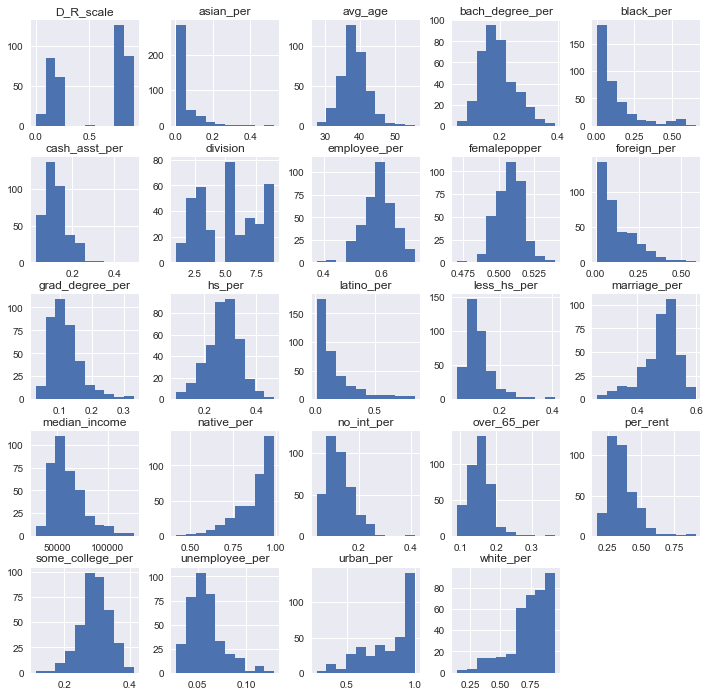

In [1258]:
df_final_drop.hist(figsize=[12,12]);

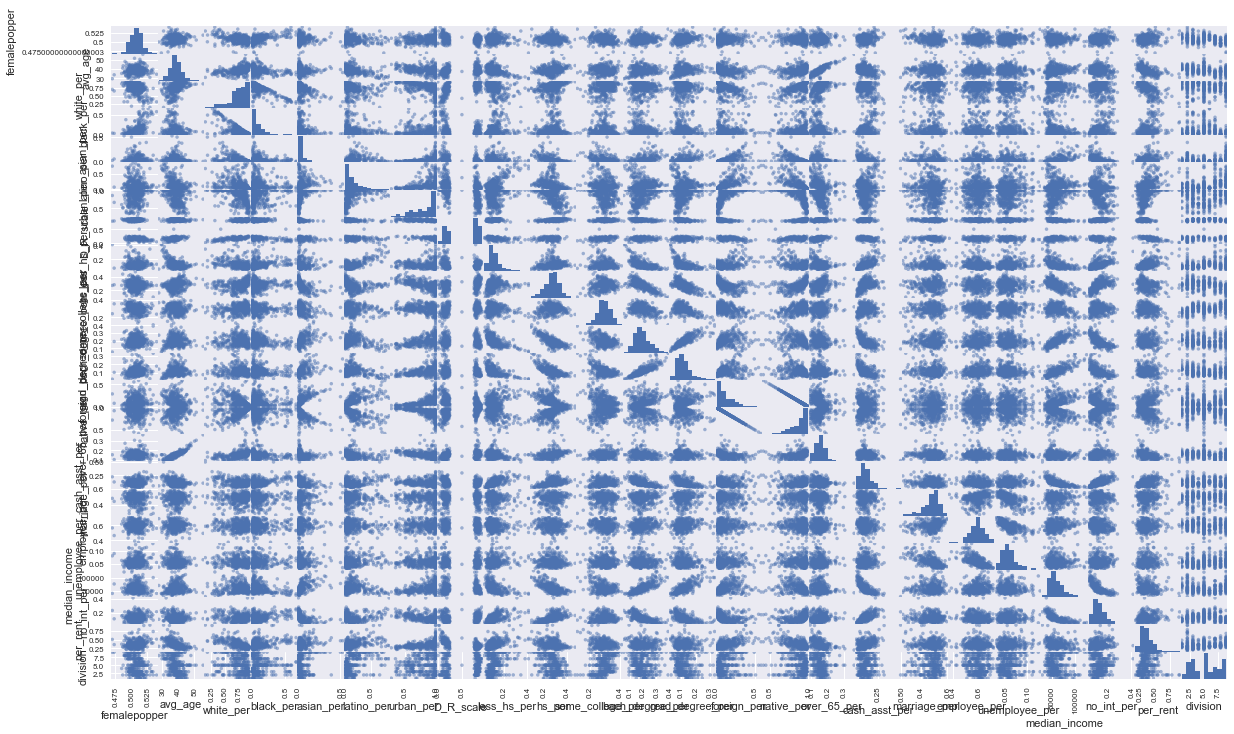

In [1259]:
pd.plotting.scatter_matrix(df_final_drop, figsize=[20,12]);

In [1260]:
# samp = sns.pairplot(df_final_drop, kind='reg')
# samp

In [1265]:
np.log(df_final_drop['per_rent']).describe()

count    374.000000
mean      -1.046862
std        0.263259
min       -1.757938
25%       -1.223280
50%       -1.062051
75%       -0.901321
max       -0.091651
Name: per_rent, dtype: float64

In [1262]:
df_final_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 434
Data columns (total 24 columns):
femalepopper        374 non-null float64
avg_age             374 non-null float64
white_per           374 non-null float64
black_per           374 non-null float64
asian_per           374 non-null float64
latino_per          374 non-null float64
urban_per           374 non-null float64
D_R_scale           374 non-null float64
less_hs_per         374 non-null float64
hs_per              374 non-null float64
some_college_per    374 non-null float64
bach_degree_per     374 non-null float64
grad_degree_per     374 non-null float64
foreign_per         374 non-null float64
native_per          374 non-null float64
over_65_per         374 non-null float64
cash_asst_per       374 non-null float64
marriage_per        374 non-null float64
employee_per        374 non-null float64
unemployee_per      374 non-null float64
median_income       374 non-null float64
no_int_per          374 non-null f

In [210]:
df_final_drop = df_final_drop.astype(float)

# Model Testing

In [1273]:
df_final_drop2 = df_final_drop.drop('D_R_scale', axis=1)

In [1274]:
X= df_final_drop2
y= df_final_drop['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     16.26
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           3.29e-41
Time:                        16:43:25   Log-Likelihood:                 16.786
No. Observations:                 374   AIC:                             12.43
Df Residuals:                     351   BIC:                             102.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
femalepopper        -0.7519      2.035     -0.369      0.712      -4.754       3.251
avg_age             -0.0027      0.011     -0.248      0.804      -0.024       0.019
white_per            1.0258      0.303      3.383      0.001       0.429       1.622
black_per            0.4965      0.329      1.509      0.132      -0.150       1.143
asian_per            0.1589      0.516      0.308      0.758      -0.855       1.173
latino_per          -0.4249      0.232     -1.829      0.068      -0.882       0.032
urban_per           -0.3663      0.133     -2.746      0.006      -0.629      -0.104
less_hs_per         57.5495    200.389      0.287      0.774    -336.565     451.664
hs_per              57.5567    200.344      0.287      0.774    -336.470     451.583
some_college_per    56.6555    200.373      0.283      0.778    -337.427     450.738
bach_degree_per     58.6347    200.372      0.293      0.770    -335.446     452.716
grad_degree_per     55.1090    200.331      0.275      0.783    -338.891     449.109
foreign_per        -55.9339    200.428     -0.279      0.780    -450.124     338.257
native_per         -56.4363    200.398     -0.282      0.778    -450.568     337.695
over_65_per         -0.5515      1.115     -0.495      0.621      -2.744       1.641
cash_asst_per       -0.4297      0.471     -0.913      0.362      -1.356       0.496
marriage_per         0.1128      0.284      0.397      0.692      -0.446       0.672
employee_per        -0.0121      0.324     -0.037      0.970      -0.650       0.626
unemployee_per       0.3661      1.305      0.281      0.779      -2.200       2.932
median_income    -6.613e-07   2.32e-06     -0.284      0.776   -5.23e-06    3.91e-06
no_int_per           0.0427      0.518      0.082      0.934      -0.977       1.062
per_rent            -0.8564      0.266     -3.224      0.001      -1.379      -0.334
division             0.0267      0.008      3.257      0.001       0.011       0.043
==============================================================================
Omnibus:                        8.540   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.733
Skew:                          -0.374   Prob(JB):                       0.0127
Kurtosis:                       2.986   Cond. No.                     2.69e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1267]:
df_final_drop.iloc[:,1:].head(2)

,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D_R_scale,less_hs_per,hs_per,some_college_per,...,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
1,38.2,0.647,0.309,0.011,0.035,0.5471,0.7731,0.1608,0.3192,0.3021,...,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,6.0
2,38.3,0.701,0.254,0.016,0.029,0.5024,0.8351,0.1636,0.3052,0.3035,...,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,6.0


In [1269]:
X= df_final_drop[['white_per', 'urban_per', 'black_per', 'asian_per', 'cash_asst_per', 'grad_degree_per', 'avg_age', 'per_rent', 'native_per', 'latino_per', 'unemployee_per']]
y= df_final_drop['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     193.7
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          1.78e-144
Time:                        16:37:41   Log-Likelihood:                 3.7982
No. Observations:                 374   AIC:                             14.40
Df Residuals:                     363   BIC:                             57.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
white_per           1.4309      0.231      6.196      0.000       0.977       1.885
urban_per          -0.3651      0.104     -3.506      0.001      -0.570      -0.160
black_per           0.9379      0.236      3.966      0.000       0.473       1.403
asian_per           1.3585      0.358      3.796      0.000       0.655       2.062
cash_asst_per      -1.1362      0.380     -2.993      0.003      -1.883      -0.390
grad_degree_per    -1.5029      0.386     -3.894      0.000      -2.262      -0.744
avg_age            -0.0040      0.004     -1.019      0.309      -0.012       0.004
per_rent           -0.4196      0.188     -2.228      0.026      -0.790      -0.049
native_per          0.1953      0.178      1.095      0.274      -0.155       0.546
latino_per          0.1117      0.125      0.896      0.371      -0.133       0.357
unemployee_per      0.3545      0.745      0.476      0.634      -1.111       1.820
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.588
Skew:                          -0.345   Prob(JB):                       0.0225
Kurtosis:                       3.109   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1270]:
df_final_drop.head(1)

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D_R_scale,less_hs_per,hs_per,...,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,division
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.7731,0.1608,0.3192,...,0.9743,0.1613,0.1606,0.494,0.530,0.066,42035.0,0.186,0.348244,6.0
2,0.5139,38.3,0.701,0.254,0.016,0.029,0.5024,0.8351,0.1636,0.3052,...,0.9722,0.1547,0.1418,0.516,0.504,0.061,46544.0,0.176,0.304818,6.0


In [1271]:
dfgd = pd.get_dummies(df_final_drop['division'], drop_first=False)

In [1275]:
dft= pd.concat([df_final_drop, dfgd], axis=1)

In [1279]:
df_final_drop3= dft.drop('division', axis=1)

In [1281]:
df_final_drop3.head(1)

,femalepopper,avg_age,white_per,black_per,asian_per,latino_per,urban_per,D_R_scale,less_hs_per,hs_per,...,per_rent,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
1,0.5122,38.2,0.647,0.309,0.011,0.035,0.5471,0.7731,0.1608,0.3192,...,0.348244,0,0,0,0,0,1,0,0,0


In [1282]:
X= df_final_drop3.drop('D_R_scale', axis=1)
y= df_final_drop3['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              D_R_scale   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     15.70
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           6.27e-47
Time:                        16:48:09   Log-Likelihood:                 43.072
No. Observations:                 374   AIC:                            -26.14
Df Residuals:                     344   BIC:                             91.58
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
femalepopper        -1.4481      1.985     -0.730      0.466      -5.352       2.456
avg_age             -0.0007      0.011     -0.061      0.952      -0.022       0.021
white_per            0.7792      0.299      2.607      0.010       0.191       1.367
black_per           -0.0901      0.337     -0.267      0.789      -0.752       0.572
asian_per            0.1040      0.504      0.206      0.837      -0.887       1.095
latino_per          -0.5490      0.228     -2.412      0.016      -0.997      -0.101
urban_per           -0.3307      0.132     -2.509      0.013      -0.590      -0.071
less_hs_per         73.5372    189.837      0.387      0.699    -299.849     446.924
hs_per              72.9142    189.793      0.384      0.701    -300.386     446.214
some_college_per    73.1747    189.823      0.385      0.700    -300.185     446.535
bach_degree_per     73.9792    189.817      0.390      0.697    -299.369     447.327
grad_degree_per     70.9163    189.791      0.374      0.709    -302.380     444.213
foreign_per        -58.8383    155.341     -0.379      0.705    -364.376     246.699
native_per         -59.1276    155.319     -0.381      0.704    -364.621     246.366
over_65_per         -0.4020      1.089     -0.369      0.712      -2.543       1.739
cash_asst_per        0.1403      0.462      0.304      0.761      -0.768       1.048
marriage_per         0.3220      0.271      1.188      0.236      -0.211       0.855
employee_per         0.3015      0.317      0.951      0.342      -0.322       0.925
unemployee_per       1.3148      1.256      1.047      0.296      -1.155       3.785
median_income     1.683e-06   2.37e-06      0.709      0.479   -2.98e-06    6.35e-06
no_int_per          -0.3529      0.504     -0.700      0.484      -1.344       0.638
per_rent            -0.5537      0.263     -2.103      0.036      -1.072      -0.036
1.0                -13.4635     34.516     -0.390      0.697     -81.352      54.425
2.0                -13.0818     34.517     -0.379      0.705     -80.973      54.809
3.0                -13.1330     34.517     -0.380      0.704     -81.025      54.759
4.0                -13.1808     34.519     -0.382      0.703     -81.075      54.713
5.0                -12.9842     34.518     -0.376      0.707     -80.877      54.909
6.0                -12.9819     34.521     -0.376      0.707     -80.881      54.917
7.0                -12.9136     34.515     -0.374      0.709     -80.800      54.973
8.0                -13.0816     34.520     -0.379      0.705     -80.978      54.815
9.0                -13.1455     34.517     -0.381      0.704     -81.037      54.746
==============================================================================
Omnibus:                       11.304   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.0

In [1283]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline
scaler = preprocessing.StandardScaler()

In [1284]:
X_train, X_test, y_train, y_test = train_test_split(df_final_drop3.drop('D_R_scale', axis=1), df_final_drop3['D_R_scale'], random_state=32,test_size=0.2)

In [1285]:
scaler.fit(df_final_vars.iloc[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1286]:
scaler.fit(X_train.iloc[:,:-1])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), columns=X_train.columns[:-1], index=X_train.index)

In [1287]:
features_scaled_train.iloc[:,10:].head()

,bach_degree_per,grad_degree_per,foreign_per,native_per,over_65_per,cash_asst_per,marriage_per,employee_per,unemployee_per,median_income,no_int_per,per_rent,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
221,-1.301357,-0.945791,-1.071306,1.071306,-0.295808,1.880028,-0.196340,-1.072896,0.202456,-1.560204,2.625932,0.271124,-0.195434,-0.415390,-0.469476,-0.281820,-0.521862,3.951090,-0.253095,-0.29542
328,-0.764613,-0.388624,-0.885350,0.885350,0.690439,0.341057,0.714767,1.152244,-0.699679,-0.729533,0.721694,-0.696688,-0.195434,2.407375,-0.469476,-0.281820,-0.521862,-0.253095,-0.253095,-0.29542
229,-0.038948,-0.502048,-0.886280,0.886280,0.056011,-0.768933,0.586893,-0.127212,-0.530528,-0.129730,0.336795,-0.769448,-0.195434,-0.415390,-0.469476,3.548367,-0.521862,-0.253095,-0.253095,-0.29542
320,-0.842299,-0.559754,-0.625012,0.625012,1.232586,1.002403,-0.643902,1.096615,-0.417762,-0.644973,0.073443,-0.101367,-0.195434,-0.415390,-0.469476,-0.281820,-0.521862,-0.253095,-0.253095,-0.29542
25,0.217065,-0.281171,0.793828,-0.793828,0.292480,-0.718885,-1.139417,-0.331183,0.991824,0.727963,-1.000223,0.340658,-0.195434,-0.415390,-0.469476,-0.281820,-0.521862,-0.253095,-0.253095,-0.29542
